# Review Classification - Router

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Router Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Worth every penny,This is the best WiFi router in this price ran...,Router
1,1,5.0,Wonderful,"Just fabulous performance, i am very glad to c...",Router
2,2,5.0,Got a good router after doing a lot of research!,If you want a router for medium sized Flat/hom...,Router
3,3,NaN,NaN,NaN,Router
4,4,NaN,NaN,NaN,Router


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Worth every penny,This is the best WiFi router in this price ran...,Router
1,5.0,Wonderful,"Just fabulous performance, i am very glad to c...",Router
2,5.0,Got a good router after doing a lot of research!,If you want a router for medium sized Flat/hom...,Router
3,NaN,NaN,NaN,Router
4,NaN,NaN,NaN,Router


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(35306, 4)

#### Observations
* The dataset has 35306 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     1125
Heading    1039
Review     1036
Product       0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(34178, 4)

#### Observations:
* There are 34178 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    19318
4.0     6216
1.0     4534
3.0     2647
2.0     1463
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating         5
Heading     1294
Review     11444
Product        1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(11444, 4)
Rating         5
Heading     1280
Review     11444
Product        1
dtype: int64


#### Observations:
* We have 11444 unique reviews for laptops
* There are only 1280 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Worth every penny,This is the best WiFi router in this price ran...,Router,246
1,5.0,Wonderful,"Just fabulous performance, i am very glad to c...",Router,429
2,5.0,Got a good router after doing a lot of research!,If you want a router for medium sized Flat/hom...,Router,507
13,5.0,Very Good Router,Compact and good looking router.\nTwo external...,Router,509
14,4.0,Worth the money,Does the job. It is good for 2 BHK home usage....,Router,510


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,2.0,Moderate,It's useless.,Router,13
1,3.0,Does the job,It doesn't support all 3G 4G data card's. Plus...,Router,215
2,3.0,Just okay,Its not working for 2 floors,Router,28
3,5.0,Fabulous!,Supper 100% usefull,Router,19
4,4.0,Delightful,Good product.. I've use it for home office.. u...,Router,79


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(11444, 5)

#### Observtions:
* The dataset has 11444 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    6170
4.0    2070
1.0    1784
3.0     915
2.0     505
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,2.0,Moderate,It's useless.,Router,13,0,1,0,0,0
1,3.0,Does the job,It doesn't support all 3G 4G data card's. Plus...,Router,215,0,0,1,0,0
2,3.0,Just okay,Its not working for 2 floors,Router,28,0,0,1,0,0
3,5.0,Fabulous!,Supper 100% usefull,Router,19,0,0,0,0,1
4,4.0,Delightful,Good product.. I've use it for home office.. u...,Router,79,0,0,0,1,0
5,4.0,Very Good,So after 10 days.\nIt's working fine. Coverage...,Router,154,0,0,0,1,0
6,5.0,Great product,Best budget product,Router,19,0,0,0,0,1
7,4.0,Really Nice,Good and robust product,Router,23,0,0,0,1,0
8,5.0,Unsatisfactory,Network signal IC is weak . Refund option is n...,Router,97,0,0,0,0,1
9,5.0,Must buy!,It is really a very good wifi range extender. ...,Router,167,0,0,0,0,1


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000,11444.000000
mean,119.442415,0.155890,0.044128,0.079955,0.180881,0.539147
std,135.728625,0.362766,0.205388,0.271235,0.384936,0.498487
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,156.250000,0.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    1.654412
1 Star                 1.897478
2 Star                 4.439901
3 Star                 3.097825
4 Star                 1.658327
5 Star                -0.157091
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 119.4


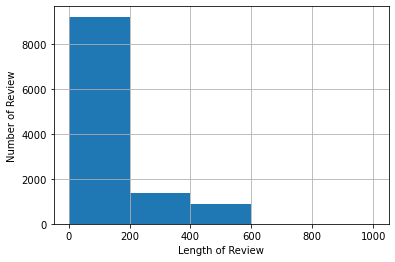

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 119.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

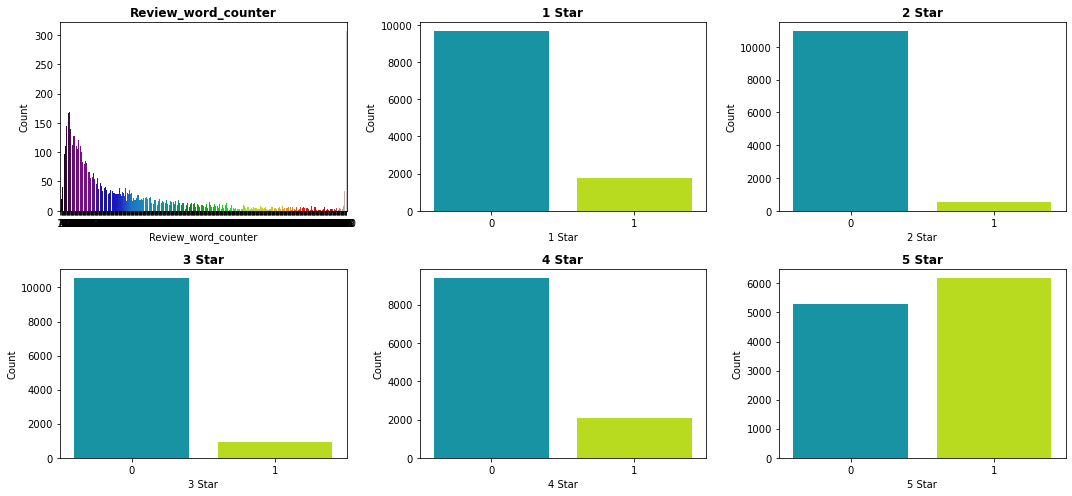

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * Around 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


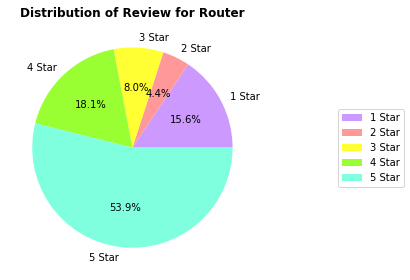

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Router",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 53.9%, followed by 4 star with 18.1%.
* 2 Star rating has least share with 4.4%

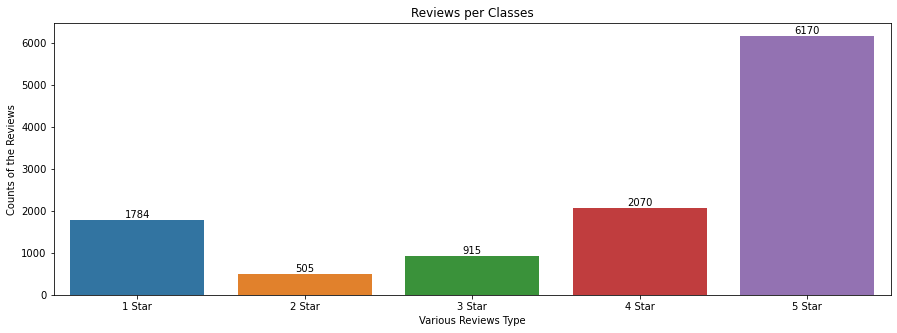

In [33]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 6170 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 2070
* 2 Star ratings have the least count of only 505.

##  Data Pre-Processing

In [34]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy!,nice router and does as expected. need to test...,Router,96,0,0,0,0,1
1,absolute rubbish!,don't buy never give speed i have also change ...,Router,51,1,0,0,0,0
2,really nice,router is good.\nwan port support 10/100 only ...,Router,136,0,0,0,1,0
3,best in the market!,thanks flipkart for fastest delivery. excellen...,Router,55,0,0,0,0,1
4,hated it!,"very bad product, totally disappointed. not go...",Router,82,1,0,0,0,0


In [35]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy!,nice router and does as expected. need to test...,Router,96,0,0,0,0,1
1,absolute rubbish!,don't buy never give speed i have also change ...,Router,51,1,0,0,0,0
2,really nice,router is good.\nwan port support 10/100 only ...,Router,136,0,0,0,1,0
3,best in the market!,thanks flipkart for fastest delivery. excellen...,Router,55,0,0,0,0,1
4,hated it!,"very bad product, totally disappointed. not go...",Router,82,1,0,0,0,0


In [36]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy,nice router and does as expected need to test...,Router,96,0,0,0,0,1
1,absolute rubbish,dont buy never give speed i have also change i...,Router,51,1,0,0,0,0
2,really nice,router is good wan port support 10 100 only n...,Router,136,0,0,0,1,0
3,best in the market,thanks flipkart for fastest delivery excellen...,Router,55,0,0,0,0,1
4,hated it,very bad product totally disappointed not go...,Router,82,1,0,0,0,0


In [37]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy,nice router and does as expected need to test ...,Router,96,0,0,0,0,1
1,absolute rubbish,dont buy never give speed i have also change it,Router,51,1,0,0,0,0
2,really nice,router is good wan port support only not a...,Router,136,0,0,0,1,0
3,best in the market,thanks flipkart for fastest delivery excellent...,Router,55,0,0,0,0,1
4,hated it,very bad product totally disappointed not good...,Router,82,1,0,0,0,0


In [38]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [39]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy,nice router expected need test comment ...,Router,96,0,0,0,0,1
1,absolute rubbish,dont buy never give speed also change it,Router,51,1,0,0,0,0
2,really nice,router good wan port support giga port...,Router,136,0,0,0,1,0
3,best market,thanks flipkart fastest delivery excellent pr...,Router,55,0,0,0,0,1
4,hated it,bad product totally disappointed good range ...,Router,82,1,0,0,0,0


In [40]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy,nice router expect need test comment speed per...,Router,96,0,0,0,0,1
1,absolut rubbish,dont buy never give speed also chang it,Router,51,1,0,0,0,0
2,realli nice,router good wan port support giga port convert...,Router,136,0,0,0,1,0
3,best market,thank flipkart fastest deliveri excel product,Router,55,0,0,0,0,1
4,hate it,bad product total disappoint good rang tower n...,Router,82,1,0,0,0,0


In [41]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,must buy,nice router expect need test comment speed per...,Router,96,0,0,0,0,1
1,absolut rubbish,dont buy never give speed also chang it,Router,51,1,0,0,0,0
2,realli nice,router good wan port support giga port convert...,Router,136,0,0,0,1,0
3,best market,thank flipkart fastest deliveri excel product,Router,55,0,0,0,0,1
4,hate it,bad product total disappoint good rang tower n...,Router,82,1,0,0,0,0


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [42]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(1096, 9)

In [43]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [44]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,support win cabl broadband,support win cabl broadbank rj reqd wan lan del...,Router,159,0,0,0,1,0
1,great vfm good rang,basic bought router access wifi throughout hom...,Router,397,0,0,0,0,1
2,router review,decent router requir featur configur quit smoo...,Router,142,0,0,0,1,0
3,great product worth price,recent purchas router flipkart use relianc net...,Router,508,0,0,0,0,1
4,turn good buy me,write short review use week router perform wel...,Router,287,0,0,0,0,1


In [45]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [46]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



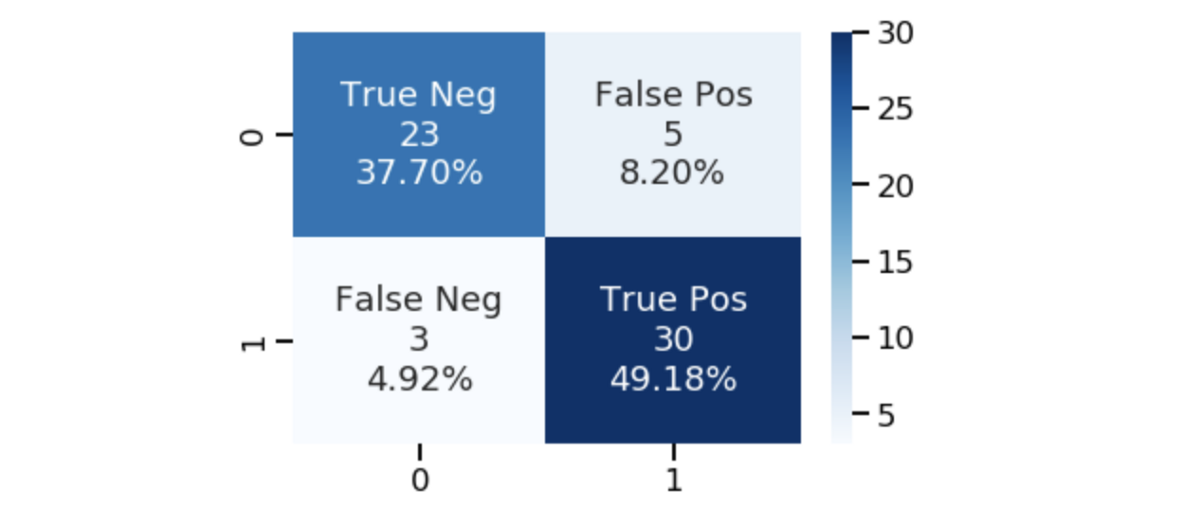

In [48]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [49]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  18.613138686131386
Cross validation score= 22.352970531726427


log loss= 9.474357193218868
hamming loss= 0.32335766423357665


f1 score= 0.4604141291108404
average precision score= 0.34552102376599636
AUC ROC score= 0.6239296717791335


label ranking average precision score= 0.4427007299270078
coverage area= 3.2007299270072993




In [50]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[196,  46],
        [ 17,  15]],

       [[229,  30],
        [  6,   9]],

       [[182,  79],
        [  6,   7]],

       [[ 77, 138],
        [ 20,  39]],

       [[ 54,  65],
        [ 36, 119]]])

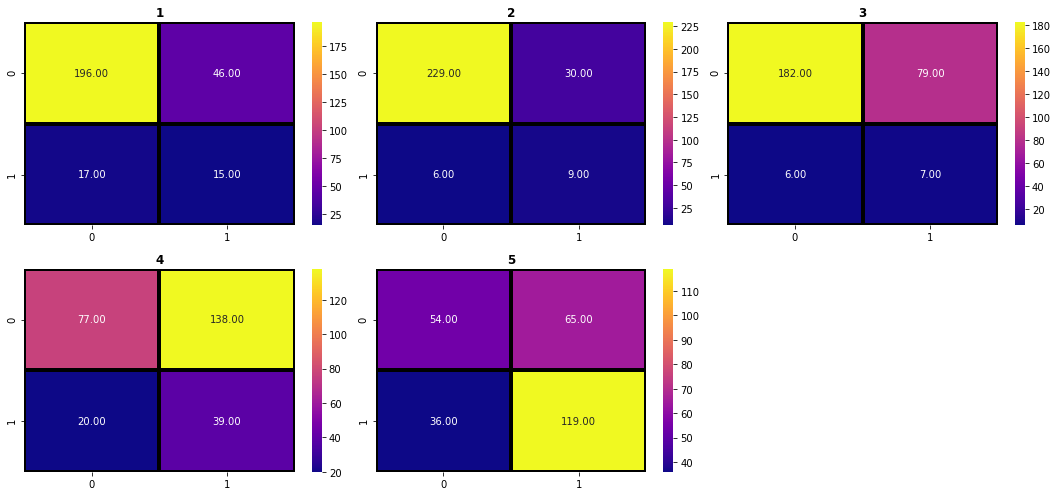

In [51]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [52]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  30.29197080291971
Cross validation score= 31.750380517503807


log loss= 24.07630033367862
hamming loss= 0.27883211678832115


AUC ROC score= 0.5937097676970877
f1 score= 0.3029197080291971
average precision score= 0.3029197080291971


coverage area= 3.7883211678832116
label ranking average precision score= 0.442335766423359


In [53]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[225,  17],
        [ 21,  11]],

       [[228,  31],
        [  6,   9]],

       [[212,  49],
        [  9,   4]],

       [[145,  70],
        [ 39,  20]],

       [[ 95,  24],
        [116,  39]]])

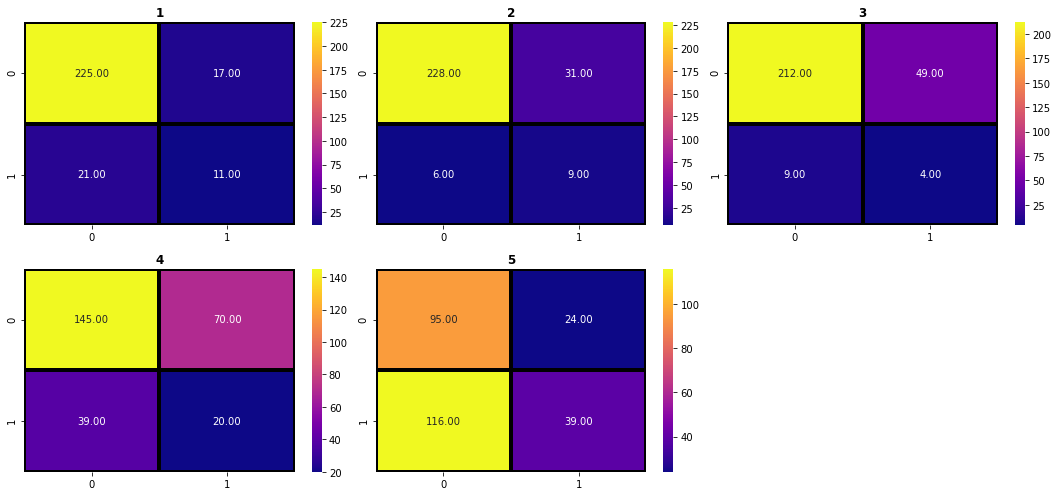

In [54]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [55]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  54.379562043795616
Cross validation score= 53.10252763430397


log loss= 10.82935829044634
hamming loss= 0.15255474452554746


AUC ROC score= 0.529440498566459
f1 score= 0.5877712031558185
average precision score= 0.6394849785407726


coverage area= 2.8248175182481754
label ranking average precision score= 0.6350364963503645


In [56]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[242,   0],
        [ 32,   0]],

       [[259,   0],
        [ 15,   0]],

       [[261,   0],
        [ 13,   0]],

       [[213,   2],
        [ 56,   3]],

       [[ 37,  82],
        [  9, 146]]])

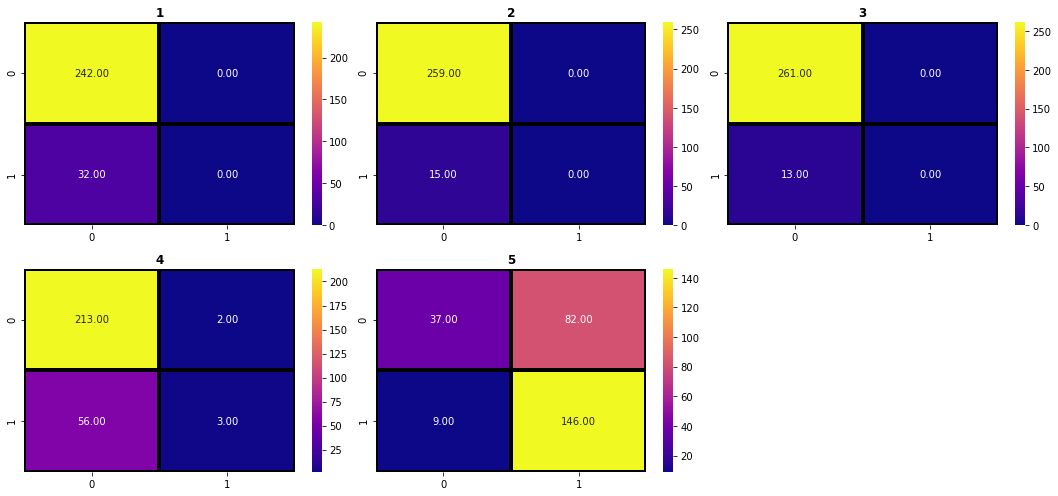

In [57]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [58]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  42.700729927007295
Cross validation score= 44.43196846071313


log loss= 15.462355553026253
hamming loss= 0.20437956204379562


AUC ROC score= 0.5518612710388173
f1 score= 0.45945945945945943
average precision score= 0.48770491803278687


label ranking average precision score= 0.5437956204379564
coverage area= 3.27007299270073


In [59]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[237,   5],
        [ 29,   3]],

       [[244,  15],
        [ 13,   2]],

       [[258,   3],
        [ 11,   2]],

       [[166,  49],
        [ 42,  17]],

       [[ 66,  53],
        [ 60,  95]]])

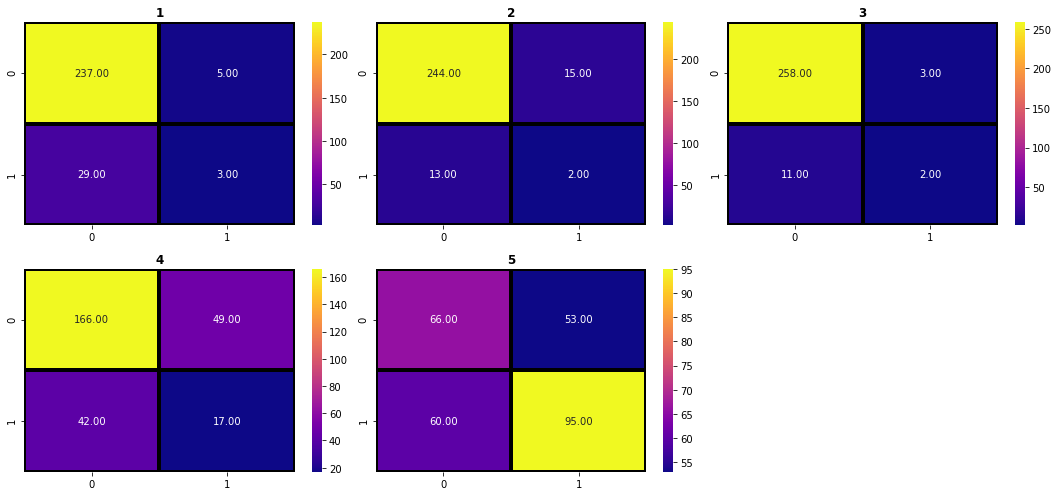

In [60]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [61]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,54.379562,53.102528,0.152555,10.829358,0.529440,0.587771,0.639485,2.824818,0.635036
1,Adapted algorithm,42.700730,44.431968,0.204380,15.462356,0.551861,0.459459,0.487705,3.270073,0.543796
2,Label powerset,30.291971,31.750381,0.278832,24.076300,0.593710,0.302920,0.302920,3.788321,0.442336
3,Binary Relevance,18.613139,22.352971,0.323358,9.474357,0.623930,0.460414,0.345521,3.200730,0.442701


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Binary Relevance.
* The AUC ROC Score for Binary Relevance is maximum which is 0.62
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [62]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [63]:
z.shape

(11444,)

In [64]:
y.shape

(11444, 5)

In [65]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [66]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [67]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  9.612023767913316
Cross validation score= 10.328535988562065


log loss= 19.459288353026288
hamming loss= 0.5481300244669696


f1 score= 0.2308974987739088
average precision score= 0.1604854104172348
AUC ROC score= 0.5225640098147448


label ranking average precision score= 0.3150704881743079
coverage area= 4.097168822090178




In [68]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[1026, 1400],
        [ 120,  315]],

       [[1486, 1244],
        [  70,   61]],

       [[1106, 1519],
        [  91,  145]],

       [[ 555, 1817],
        [ 121,  368]],

       [[1114,  177],
        [1282,  288]]])

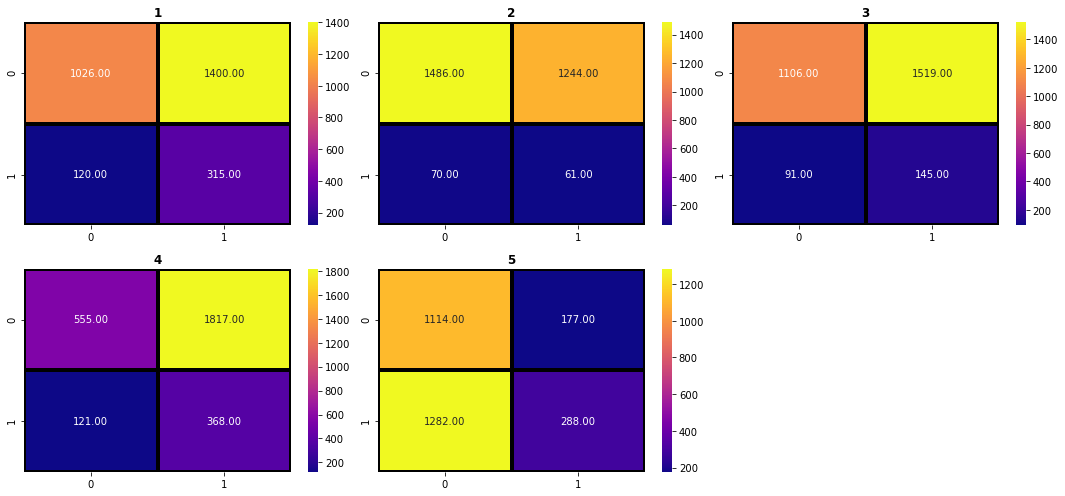

In [69]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [70]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  17.721076546662008
Cross validation score= 18.21912922041372


log loss= 28.418133391688144
hamming loss= 0.329115693813352


AUC ROC score= 0.5196645453980894
f1 score= 0.17721076546662007
average precision score= 0.17721076546662007


coverage area= 4.29115693813352
label ranking average precision score= 0.34176861237330963


In [71]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[2251,  175],
        [ 368,   67]],

       [[1602, 1128],
        [  70,   61]],

       [[2085,  540],
        [ 183,   53]],

       [[2035,  337],
        [ 409,   80]],

       [[1117,  174],
        [1324,  246]]])

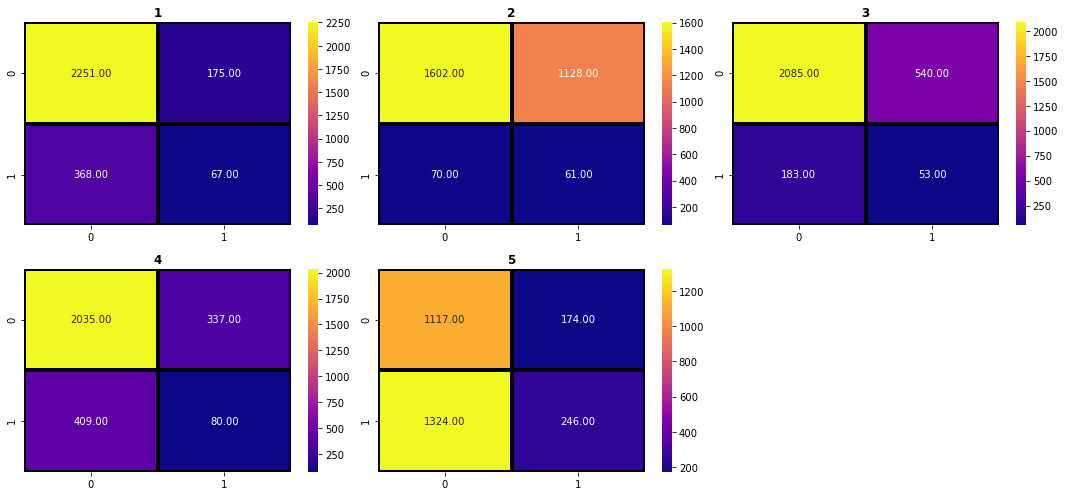

In [72]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [73]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  55.47011534428522
Cross validation score= 54.29913200613134


log loss= 9.429546708030697
hamming loss= 0.14197832925550508


AUC ROC score= 0.5532434039270965
f1 score= 0.6097982708933718
average precision score= 0.6770477815699659


coverage area= 2.781195386228591
label ranking average precision score= 0.6437609227542953


In [74]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[2420,    6],
        [ 376,   59]],

       [[2730,    0],
        [ 131,    0]],

       [[2625,    0],
        [ 236,    0]],

       [[2370,    2],
        [ 484,    5]],

       [[ 542,  749],
        [  47, 1523]]])

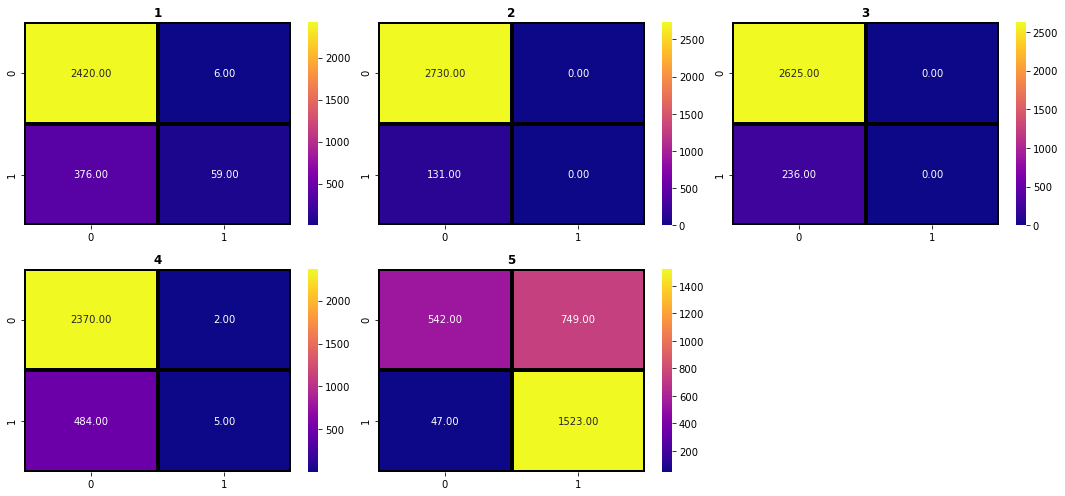

In [75]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [76]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  46.627053477804964
Cross validation score= 45.613388213802914


log loss= 14.854683363024796
hamming loss= 0.20538273331003146


AUC ROC score= 0.597642361706943
f1 score= 0.5275008041170794
average precision score= 0.48853142686922846


label ranking average precision score= 0.6026564138413264
coverage area= 2.8287312128626354


In [77]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[2067,  359],
        [ 155,  280]],

       [[2553,  177],
        [ 110,   21]],

       [[2291,  334],
        [ 191,   45]],

       [[2156,  216],
        [ 434,   55]],

       [[ 660,  631],
        [ 331, 1239]]])

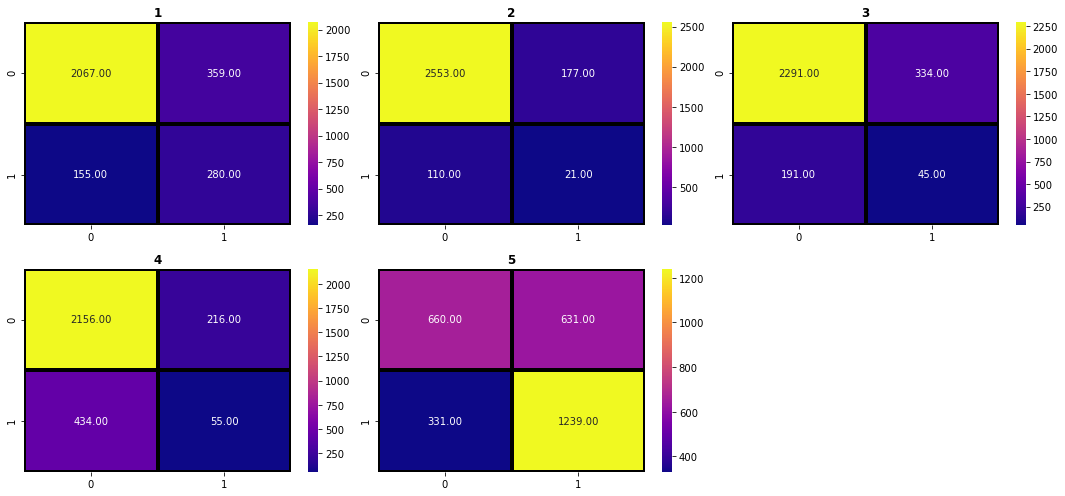

In [78]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [79]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,55.470115,54.299132,0.141978,9.429547,0.553243,0.609798,0.677048,2.781195,0.643761
1,Adapted algorithm,46.627053,45.613388,0.205383,14.854683,0.597642,0.527501,0.488531,2.828731,0.602656
2,Label powerset,17.721077,18.219129,0.329116,28.418133,0.519665,0.177211,0.177211,4.291157,0.341769
3,Binary Relevance,9.612024,10.328536,0.548130,19.459288,0.522564,0.230897,0.160485,4.097169,0.315070


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.56
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [80]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,18.613139,22.352971,0.323358,9.474357,0.623930,0.460414,0.345521,3.200730,0.442701,Heading
1,Classifier chain,54.379562,53.102528,0.152555,10.829358,0.529440,0.587771,0.639485,2.824818,0.635036,Heading
2,Label powerset,30.291971,31.750381,0.278832,24.076300,0.593710,0.302920,0.302920,3.788321,0.442336,Heading
3,Adapted algorithm,42.700730,44.431968,0.204380,15.462356,0.551861,0.459459,0.487705,3.270073,0.543796,Heading
0,Binary Relevance,9.612024,10.328536,0.548130,19.459288,0.522564,0.230897,0.160485,4.097169,0.315070,Review
1,Classifier chain,55.470115,54.299132,0.141978,9.429547,0.553243,0.609798,0.677048,2.781195,0.643761,Review
2,Label powerset,17.721077,18.219129,0.329116,28.418133,0.519665,0.177211,0.177211,4.291157,0.341769,Review
3,Adapted algorithm,46.627053,45.613388,0.205383,14.854683,0.597642,0.527501,0.488531,2.828731,0.602656,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Binary Relevance for heading of reviews and Classifier for reviews. 
* The AUC ROC Score by Binary Relevanve is maximum for heading and by Adapted Algorithm for reviews.
* The accuracy score of Classifier Chain is best for both heading and reviews

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))